In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, feature_extraction

%matplotlib inline

plt.style.use('seaborn')

In [3]:
test_users = pd.read_csv("test_users.csv")
train_users = pd.read_csv("train_users_2.csv")
print(train_users.shape)
print(test_users.shape)

(213451, 16)
(62096, 15)


In [4]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [7]:
print(train_users.country_destination.value_counts())

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64


Text(0, 0.5, 'Percentage of booking')

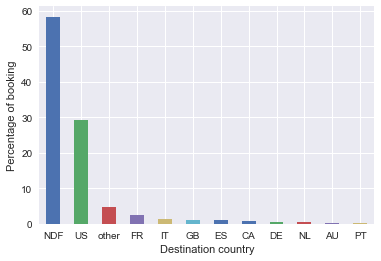

In [9]:
# booking percentage
import seaborn as sns
sns.set_style()
des_countries = train_users.country_destination.value_counts(dropna = False) / train_users.shape[0] * 100
## train_users.shape[0]: how many rows ,

des_countries.plot('bar', rot = 0)
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')

## the features

In [10]:
# age !
# info about series URL:  https://www.cnblogs.com/sirkevin/p/5741853.html
all_users.age.describe()
## dataframe use info(), series object use describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

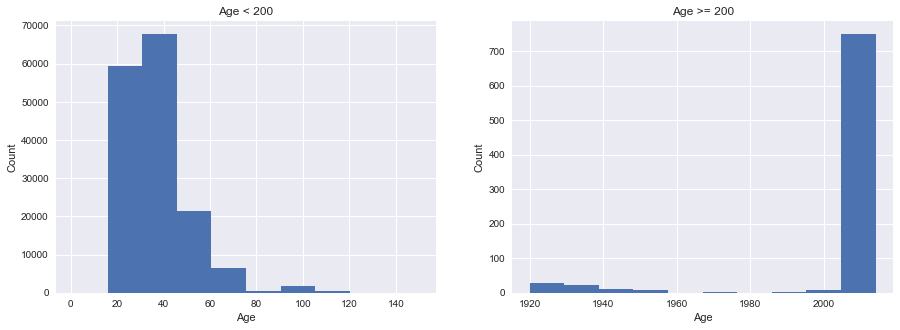

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axes[0].set_title('Age < 200')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
all_users[all_users.age < 200].age.hist(bins = 10, ax = axes[0])

axes[1].set_title('Age >= 200')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
all_users[all_users.age >= 200].age.hist(bins = 10, ax = axes[1])

## the ages between 1920-2018 needs to be processed, use (sign-up time - age) = age

In [13]:
age_country_users = pd.concat([train_users['age'],train_users['country_destination']],axis=1,keys=['age','country_destination'])
age_country_users = age_country_users[np.isfinite(age_country_users['age'])]

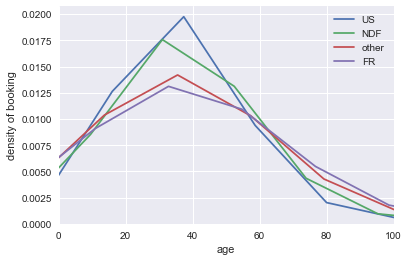

In [34]:
sns.kdeplot(age_country_users[age_country_users.country_destination == "US"].age,label="US")
sns.kdeplot(age_country_users[age_country_users.country_destination == "NDF"].age,label="NDF")
sns.kdeplot(age_country_users[age_country_users.country_destination == "other"].age,label="other")
sns.kdeplot(age_country_users[age_country_users.country_destination == "FR"].age,label="FR")
plt.xlim([0,100])
plt.xlabel('age')
plt.ylabel('density of booking')
plt.legend()

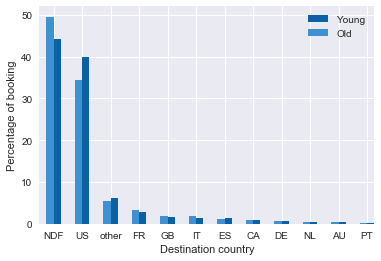

In [12]:
# split age at 45
young = sum(train_users.age <45)
old = sum(train_users.age >=45)


young_destinations = train_users.loc[train_users.age < 45, 'country_destination'].value_counts() / young * 100
old_destinations = train_users.loc[train_users.age >=45, 'country_destination'].value_counts() / old * 100
#other_destinations = train_users.loc[train_users.gender == 'OTHER', 'country_destination'].value_counts() / other * 100

young_destinations.plot('bar', width = 0.25, color = '#0b61a4', position = 0, label = 'Young', rot = 0)
old_destinations.plot('bar', width = 0.25, color = '#3f92d2', position = 1, label = 'Old', rot = 0)
#other_destinations.plot('bar', width = 0.25, color = '#66a3d2', position = 2, label = 'Other', rot = 0)

plt.legend()
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')
plt.show()

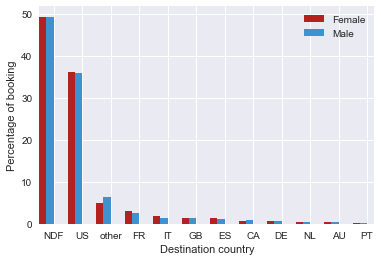

In [32]:
female = sum(train_users.gender == 'FEMALE')
male = sum(train_users.gender == 'MALE')
other = sum(train_users.gender == 'OTHER')

female_destinations = train_users.loc[train_users.gender == 'FEMALE', 'country_destination'].value_counts() / female * 100
male_destinations = train_users.loc[train_users.gender == 'MALE', 'country_destination'].value_counts() / male * 100
other_destinations = train_users.loc[train_users.gender == 'OTHER', 'country_destination'].value_counts() / other * 100

female_destinations.plot('bar', width = 0.25, color = '#B22222',position = 2, label = 'Female', rot = 0)
male_destinations.plot('bar', width = 0.25, color = '#3f92d2', position = 1,label = 'Male', rot = 0)
#other_destinations.plot('bar', width = 0.25, color = '#808080',position = 1, label = 'Other', rot = 0)
#tmp = female_destinations[0]
#female_destinations[0]=female_destinations[1]
#other_destinations[1]=tmp
plt.legend()
plt.xlabel('Destination country')
plt.ylabel('Percentage of booking')
plt.show()

Text(0, 0.5, 'Count created')

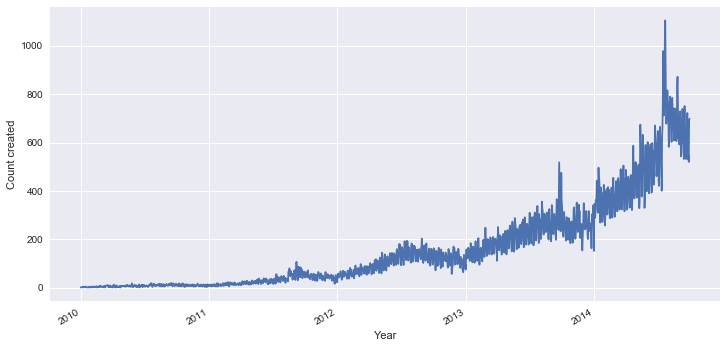

In [97]:
# date_account_created / timestamp_first_active

fig = plt.figure(figsize = (12, 6))
all_users.date_account_created = pd.to_datetime(all_users.date_account_created)
all_users.date_account_created.value_counts().plot('line')
plt.xlabel('Year')
plt.ylabel('Count created')

Text(0, 0.5, 'Count first active')

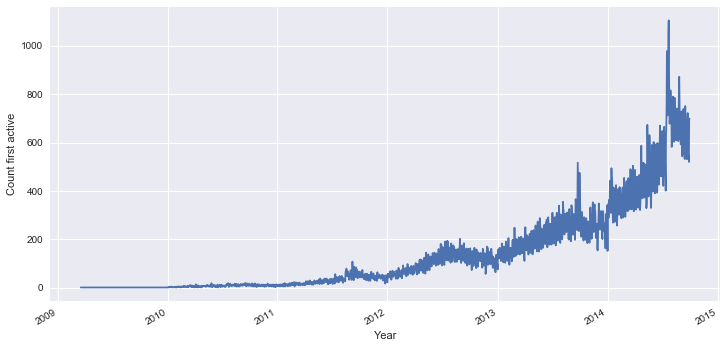

In [98]:
fig = plt.figure(figsize = (12, 6))
all_users['date_first_active'] = pd.to_datetime(all_users.timestamp_first_active // 1000000, format = '%Y%m%d')
all_users.date_first_active.value_counts().plot('line')
plt.xlabel('Year')
plt.ylabel('Count first active')

In [99]:
##The feature "date_account_create" and "date_first_active" is almost same

In [100]:
## signup_method / signup_app

all_users.signup_method.value_counts()

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

In [101]:
all_users.signup_app.value_counts()

Web        219918
iOS         34593
Android     10519
Moweb       10517
Name: signup_app, dtype: int64

In [102]:
all_users.first_device_type.value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

In [103]:
all_users.first_browser.value_counts()

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
RockMelt                   24
Iron                       24
Yandex.Browser             14
IceWeasel                  14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
Opera Mini                  8
TenFourFox                  8
wOSBrowser                  7
CoolNovo                    6
Opera Mobile                4
Avant Browser               4
Mozilla   

In [104]:
all_users.language.value_counts()

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
da               75
pl               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

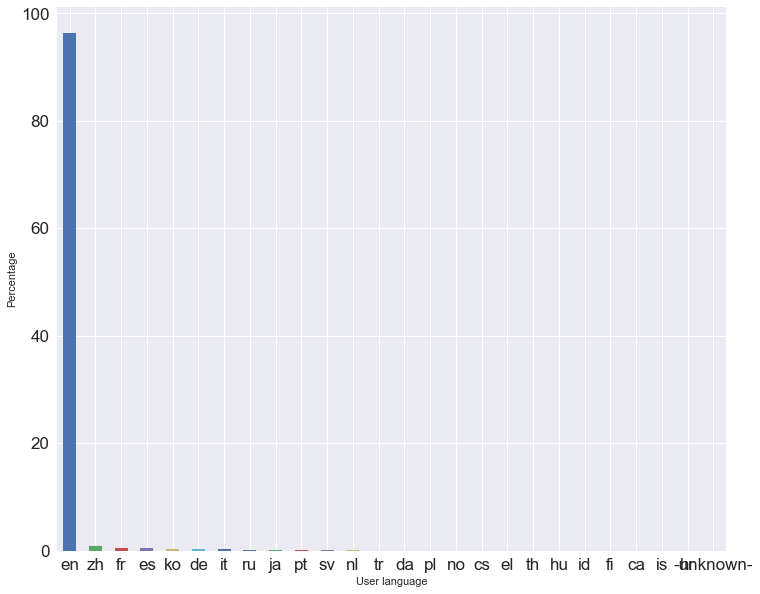

In [105]:
lang = all_users.language.value_counts() / all_users.shape[0] * 100
plt.figure(figsize = (12, 10))
plt.xlabel('User language')
plt.ylabel('Percentage')
lang.plot('bar', fontsize = 17, rot = 0)

In [106]:
all_users.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

In [107]:
all_users.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

In [108]:
sessions = pd.read_csv('sessions.csv')
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [109]:
sessions.shape[0]

10567737

In [110]:
len(sessions.user_id.unique())

135484

In [111]:
df_sess = sessions.groupby(['user_id']).user_id.count().reset_index(name = 'session_count')
df_sess.head()

,user_id,session_count
0,00023iyk9l,40
1,0010k6l0om,63
2,001wyh0pz8,90
3,0028jgx1x1,31
4,002qnbzfs5,789


In [112]:
df_sess.session_count.describe()
## i think more time spent on searching, more possible that one book

count    135483.000000
mean         77.745850
std         112.563746
min           1.000000
25%          16.000000
50%          41.000000
75%          95.000000
max        2722.000000
Name: session_count, dtype: float64

In [113]:
secs = sessions.groupby(['user_id']).secs_elapsed.sum().reset_index()
secs.columns = ['user_id', 'secs_elapsed']
secs.describe()

,secs_elapsed
count,1.354830e+05
mean,1.489732e+06
std,1.892923e+06
min,0.000000e+00
25%,2.605980e+05
50%,8.502710e+05
75%,2.000422e+06
max,3.822136e+07


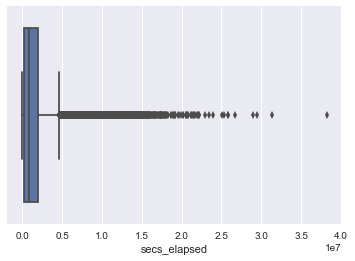

In [114]:
sns.boxplot(x = secs.secs_elapsed)

In [115]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

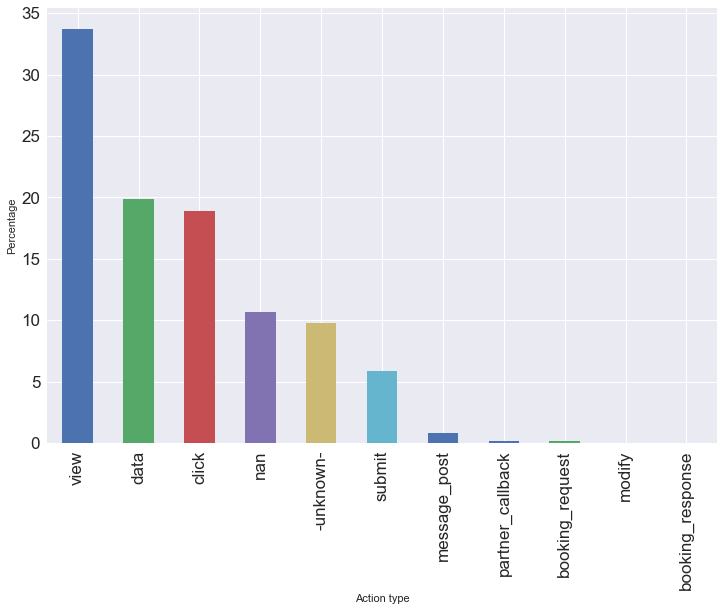

In [116]:
at = sessions.action_type.value_counts(dropna = False) / sessions.shape[0] * 100
plt.figure(figsize = (12, 8))
plt.xlabel('Action type')
plt.ylabel('Percentage')
at.plot('bar', fontsize = 17)

In [117]:
sessions.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
ajax_refresh_subtotal         487744
update                        365130
similar_listings              364624
social_connections            339000
reviews                       320591
active                        188036
similar_listings_v2           168788
lookup                        162041
create                        155887
dashboard                     152952
header_userpic                141830
collections                   124417
edit                          109083
campaigns                     105028
track_page_view                81117
unavailabilities               78317
qt2                            64651
notifications                  59392
confirm_email                  58726
requested                      57034
identity                       53631
ajax_check_dates               52517
s

In [118]:
sessions.action_detail.value_counts()

view_search_results               1776885
p3                                1376550
-unknown-                         1031141
wishlist_content_update            706824
user_profile                       656839
change_trip_characteristics        487744
similar_listings                   364624
user_social_connections            336799
update_listing                     269779
listing_reviews                    269021
dashboard                          152952
user_wishlists                     152672
header_userpic                     141830
message_thread                     132395
edit_profile                       108686
message_post                        87103
contact_host                        81041
unavailable_dates                   77795
confirm_email_link                  58422
create_user                         54878
change_contact_host_dates           52517
user_profile_content_update         50434
user_reviews                        49665
p5                                

## Preprocess

In [119]:
train_users_labels = train_users.loc[:, 'country_destination']
print(train_users_labels.head())
#df.loc[行标签,列标签]
#df.loc['a':'b']#选取ab两行数据
#df.loc[:,'one']#选取one列的数据

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object


In [120]:
train_users_attrs = train_users.iloc[:, 0:15]
train_users_attrs.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [121]:
train_users = train_users.drop(['date_first_booking'], axis = 1)
test_users = test_users.drop(['date_first_booking'], axis = 1)

In [122]:
#  Split the feature "data_account_created" to "year", "month", "day"
date_acc_created_train = np.vstack(train_users.date_account_created.astype(str).apply(
    lambda x : list(map(int, x.split('-')))).values)

train_users['create_year'] = date_acc_created_train[:, 0]
train_users['create_month'] = date_acc_created_train[:, 1]
train_users['create_day'] = date_acc_created_train[:, 2]
train_users = train_users.drop(['date_account_created'], axis = 1)

date_acc_created_test = np.vstack(test_users.date_account_created.astype(str).apply(
    lambda x : list(map(int, x.split('-')))).values)

test_users['create_year'] = date_acc_created_test[:, 0]
test_users['create_month'] = date_acc_created_test[:, 1]
test_users['create_day'] = date_acc_created_test[:, 2]
test_users = test_users.drop(['date_account_created'], axis = 1)

In [123]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14


In [124]:
train_users.loc[train_users.gender == '-unknown-', 'gender'] = -1
train_users.loc[train_users.gender.isnull(), 'gender'] = -1
test_users.loc[test_users.gender == '-unknown-', 'gender'] = -1
test_users.loc[test_users.gender.isnull(), 'gender'] = -1

In [125]:
gender_enc = {'FEMALE' : 0,
             'MALE' : 1,
             'OTHER' : 2,
             -1 : -1}
for data in [train_users, test_users]:
    data.gender = data.gender.apply(lambda x : gender_enc[x])

In [126]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14


In [127]:
train_users.age.describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [128]:
train_users.loc[train_users.age > 90, 'age'] = np.nan
train_users.loc[train_users.age < 16, 'age'] = np.nan
test_users.loc[test_users.age > 90, 'age'] = np.nan
test_users.loc[test_users.age < 16, 'age'] = np.nan

In [129]:
print(train_users.age.median())
print(test_users.age.median())

33.0
31.0


In [130]:
train_users.loc[train_users.age.isnull(), 'age'] = train_users.age.median()
test_users.loc[test_users.age.isnull(), 'age'] = test_users.age.median()

In [131]:
signup_enc = {'facebook' : 0,
             'google' : 1,
             'basic' : 2,
             'weibo' : 3}
for data in [train_users, test_users]:
    data.signup_method = data.signup_method.apply(lambda x : signup_enc[x])

In [132]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,33.0,0,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,0,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,2,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,0,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,2,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14


In [133]:
test_users.loc[test_users.language == '-unknown-', 'language'] = test_users.language.mode()[0]
## mode 众数

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_users.language = le.fit_transform(train_users.language)
test_users.language = le.fit_transform(test_users.language)

In [135]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,33.0,0,0,5,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,0,0,5,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,2,3,5,direct,direct,untracked,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,0,0,5,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,2,0,5,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2010,9,14


In [136]:
train_users.language.unique()

array([ 5,  8,  3,  6, 13, 19, 24, 15, 14, 20, 18,  4, 21, 16, 10,  2, 11,
        7, 17, 23, 22,  1,  9,  0, 12])

In [137]:
train_users.affiliate_channel = le.fit_transform(train_users.affiliate_channel)
train_users.affiliate_provider = le.fit_transform(train_users.affiliate_provider)
test_users.affiliate_channel = le.fit_transform(test_users.affiliate_channel)
test_users.affiliate_provider = le.fit_transform(test_users.affiliate_provider)

train_users.loc[train_users.first_affiliate_tracked.isnull(), 'first_affiliate_tracked'] = 'untracked'
train_users.first_affiliate_tracked = le.fit_transform(train_users.first_affiliate_tracked)

test_users.loc[test_users.first_affiliate_tracked.isnull(), 'first_affiliate_tracked'] = 'untracked'
test_users.first_affiliate_tracked = le.fit_transform(test_users.first_affiliate_tracked)

In [138]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,33.0,0,0,5,2,4,6,Web,Mac Desktop,Chrome,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,0,0,5,7,8,6,Web,Mac Desktop,Chrome,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,2,3,5,2,4,6,Web,Windows Desktop,IE,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,0,0,5,2,4,6,Web,Mac Desktop,Firefox,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,2,0,5,2,4,6,Web,Mac Desktop,Chrome,US,2010,9,14


In [139]:
train_users.signup_app = le.fit_transform(train_users.signup_app)
train_users.first_device_type = le.fit_transform(train_users.first_device_type)
train_users.first_browser = le.fit_transform(train_users.first_browser)
test_users.signup_app = le.fit_transform(test_users.signup_app)
test_users.first_device_type = le.fit_transform(test_users.first_device_type)
test_users.first_browser = le.fit_transform(test_users.first_browser)

In [140]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day
0,gxn3p5htnn,20090319043255,-1,33.0,0,0,5,2,4,6,2,3,8,NDF,2010,6,28
1,820tgsjxq7,20090523174809,1,38.0,0,0,5,7,8,6,2,3,8,NDF,2011,5,25
2,4ft3gnwmtx,20090609231247,0,56.0,2,3,5,2,4,6,2,6,21,US,2010,9,28
3,bjjt8pjhuk,20091031060129,0,42.0,0,0,5,2,4,6,2,3,17,other,2011,12,5
4,87mebub9p4,20091208061105,-1,41.0,2,0,5,2,4,6,2,3,8,US,2010,9,14


In [141]:
test_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_year,create_month,create_day
0,5uwns89zht,20140701000006,0,35.0,0,0,5,1,4,6,1,8,17,2014,7,1
1,jtl0dijy2j,20140701000051,-1,31.0,2,0,5,1,4,6,1,8,17,2014,7,1
2,xx0ulgorjt,20140701000148,-1,31.0,2,0,5,1,4,0,2,6,5,2014,7,1
3,6c6puo6ix0,20140701000215,-1,31.0,2,0,5,1,4,0,2,6,11,2014,7,1
4,czqhjk3yfe,20140701000305,-1,31.0,2,0,5,1,4,6,2,3,23,2014,7,1


In [142]:
## session
df = sessions.user_id.value_counts()
print(df.shape)
print(df.head())

(135483,)
mxqbh3ykxl    2722
0hjoc5q8nf    2644
mjbl6rrj52    2476
l5lgm3w5pc    2424
wg9413iaux    2362
Name: user_id, dtype: int64


In [143]:
df = df.to_frame()

In [144]:
df = df.rename(columns = {'user_id' : 'session_count'})
df['id'] = df.index
df.head()

,session_count,id
mxqbh3ykxl,2722,mxqbh3ykxl
0hjoc5q8nf,2644,0hjoc5q8nf
mjbl6rrj52,2476,mjbl6rrj52
l5lgm3w5pc,2424,l5lgm3w5pc
wg9413iaux,2362,wg9413iaux


In [148]:
train_users = pd.merge(train_users, df, how = 'left', on = ['id'])
test_users = pd.merge(test_users, df, how = 'left', on = ['id'])

In [149]:
train_users.session_count.fillna(0, inplace = True)
test_users.session_count.fillna(0, inplace = True)

In [150]:
train_users.session_count = train_users.session_count.astype(int)
test_users.session_count = test_users.session_count.astype(int)

In [151]:
label_df = train_users_labels.to_frame()
for data in [label_df]:
    data.country_destination = le.fit_transform(data.country_destination)

label_df.head()

,country_destination
0,7
1,7
2,10
3,11
4,10


In [152]:
train_users.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,create_year,create_month,create_day,session_count_x,session_count_y,session_count
0,gxn3p5htnn,20090319043255,-1,33.0,0,0,5,2,4,6,2,3,8,NDF,2010,6,28,NaN,NaN,0
1,820tgsjxq7,20090523174809,1,38.0,0,0,5,7,8,6,2,3,8,NDF,2011,5,25,NaN,NaN,0
2,4ft3gnwmtx,20090609231247,0,56.0,2,3,5,2,4,6,2,6,21,US,2010,9,28,NaN,NaN,0
3,bjjt8pjhuk,20091031060129,0,42.0,0,0,5,2,4,6,2,3,17,other,2011,12,5,NaN,NaN,0
4,87mebub9p4,20091208061105,-1,41.0,2,0,5,2,4,6,2,3,8,US,2010,9,14,NaN,NaN,0


In [153]:
train_users = train_users.drop(['id'], axis = 1)
train_users = train_users.drop([ 'timestamp_first_active'], axis = 1)
train_users = train_users.drop(['country_destination'], axis = 1)
train_users.head()

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_year,create_month,create_day,session_count_x,session_count_y,session_count
0,-1,33.0,0,0,5,2,4,6,2,3,8,2010,6,28,NaN,NaN,0
1,1,38.0,0,0,5,7,8,6,2,3,8,2011,5,25,NaN,NaN,0
2,0,56.0,2,3,5,2,4,6,2,6,21,2010,9,28,NaN,NaN,0
3,0,42.0,0,0,5,2,4,6,2,3,17,2011,12,5,NaN,NaN,0
4,-1,41.0,2,0,5,2,4,6,2,3,8,2010,9,14,NaN,NaN,0


In [154]:
train_users.shape

(213451, 17)

In [156]:
test_users.head()
## 多id和timestamp

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,create_year,create_month,create_day,session_count_x,session_count_y,session_count
0,5uwns89zht,20140701000006,0,35.0,0,0,5,1,4,6,1,8,17,2014,7,1,8.0,8.0,8
1,jtl0dijy2j,20140701000051,-1,31.0,2,0,5,1,4,6,1,8,17,2014,7,1,19.0,19.0,19
2,xx0ulgorjt,20140701000148,-1,31.0,2,0,5,1,4,0,2,6,5,2014,7,1,58.0,58.0,58
3,6c6puo6ix0,20140701000215,-1,31.0,2,0,5,1,4,0,2,6,11,2014,7,1,11.0,11.0,11
4,czqhjk3yfe,20140701000305,-1,31.0,2,0,5,1,4,6,2,3,23,2014,7,1,19.0,19.0,19


In [157]:
from sklearn import preprocessing
ss = preprocessing.StandardScaler()
train_users_scaled = pd.DataFrame(ss.fit_transform(train_users))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [158]:
train_users_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.987150,-0.225180,-1.596552,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.754483,-3.222044,-0.006939,1.387946,NaN,NaN,-0.345061
1,1.452068,0.339346,-1.596552,-0.427798,-0.139772,2.384576,0.956108,0.811626,-0.018455,-0.928434,-0.754483,-2.156499,-0.315897,1.044700,NaN,NaN,-0.345061
2,0.232459,2.371640,0.628333,-0.035009,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,0.644693,0.169757,-3.222044,0.919936,1.387946,NaN,NaN,-0.345061
3,0.232459,0.790967,-1.596552,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.114625,-2.156499,1.846811,-1.243607,NaN,NaN,-0.345061
4,-0.987150,0.678061,0.628333,-0.427798,-0.139772,-0.508867,-0.589495,0.811626,-0.018455,-0.928434,-0.754483,-3.222044,0.919936,-0.213869,NaN,NaN,-0.345061


## select and train models

In [74]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

[train_data, test_data, train_label, test_label] = train_test_split(train_users_scaled, label_df, test_size = 0.3, random_state = 817)

gnb = GaussianNB()
gnb.fit(train_data, train_label.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [75]:
print('Accuracy score for Navie Bayes:')
print(gnb.score(test_data, test_label))

Accuracy score for Navie Bayes:
0.5451464801049409


In [76]:
# Linear Discriminant Analysis

In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(train_data, train_label.values.ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [78]:
print('Accuracy score for LDA:')
print(lda.score(test_data, test_label))

Accuracy score for LDA:
0.5896683115747392


In [79]:
# Gradient Boosting Classifier

In [80]:
 from sklearn.ensemble import GradientBoostingClassifier

 gb = GradientBoostingClassifier(max_depth = 4, n_estimators = 100, random_state = 817)
 gb.fit(train_data, train_label.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=817,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [81]:
print('Accuracy score for GDBT:')
print(gb.score(test_data, test_label))

Accuracy score for GDBT:
0.6307389593353738


# Prediction

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(max_depth = 4, n_estimators = 100, random_state = 817)
gb.fit(train_users_scaled, label_df.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=817,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [83]:
test_users_scaled = pd.DataFrame(ss.fit_transform(test_users.drop(['id', 'timestamp_first_active'], axis = 1)))

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [84]:
prediction_proba = gb.predict_proba(test_users_scaled)

In [85]:

ids_test = test_users['id']

ids = []
countries = []

for i in range(len(ids_test)):
    idx = ids_test[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(prediction_proba[2])[::-1][:5]).tolist()

In [86]:
submission = pd.DataFrame({
    "id" : ids,
    "country" : countries
})

In [87]:
submission.to_csv('submission.csv', index = False)